Loading librarys 

In [197]:
import requests
import numpy as np
import pandas as pd
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt

Loading Image prediction data using request library then using the pandas library to read data into the python environment

In [151]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Opening a tsv file and saving the response content
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read TSV file
image_data_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [152]:
image_data_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


tweet_id: the unique identifier for each tweet

jpg_url: dog's image URL

img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

p1: algorithm's #1 prediction for the image in the tweet

p1_conf: how confident the algorithm is in its #1 prediction

p1_dog: whether or not the #1 prediction is a breed of dog

p2: algorithm's #2 prediction for the image in the tweet

p2_conf: how confident the algorithm is in its #2 prediction

p2_dog: whether or not the #2 prediction is a breed of dog

p3: algorithm's #3 prediction for the image in the tweet

p3_conf: how confident the algorithm is in its #3 prediction

p3_dog: whether or not the #3 prediction is a breed of dog

Reading the tweet archive files using pandas read_csv

In [153]:
tweet_archive_data = pd.read_csv("twitter-archive-enhanced (1).csv", sep=",")
tweet_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Before the analysis proper, there is the need to describe the column for easier understand by potential contributor to the already existening code.
### column description of the tweet_archive

tweet_id: the unique identifier for each tweet

in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

timestamp: time when this Tweet was created

source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

text: actual UTF-8 text of the status update

retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

retweeted_status_timestamp: time of retweet

expanded_urls: tweet URL

rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

name: name of the dog

doggo: one of the 4 dog "stage"

floofer: one of the 4 dog "stage"

pupper: one of the 4 dog "stage"

puppo: one of the 4 dog "stageColumns description:

Loading the tweeter dataset and picking the variables or columns that are highly needed for our analysis

In [154]:
data = []
with open('tweet-json.txt', 'r') as file:
    
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        date_created = tweets["created_at"]
        full_text = tweets["full_text"]
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        followers_count = tweets["user"]["followers_count"]
        friends_count = tweets["user"]["friends_count"]
        
        data.append({"date":date_created, "tweet_id":tweet_id, "retweet_count":retweet_count, "favorite_tweet":favorite_count, "full_text":full_text, "friends_count": friends_count, "followers_count": followers_count})

tweet_text = pd.DataFrame(data)

converting date columns to datetime and dropping columns that is not needed

In [155]:
tweet_text["dates"] = pd.to_datetime(tweet_text["date"], format='%Y%m%d', errors='ignore')
tweet_text.drop(columns=["date"], axis =1)

,tweet_id,retweet_count,favorite_tweet,full_text,friends_count,followers_count,dates
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,104,3200889,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,104,3200889,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,104,3200889,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,104,3200889,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,104,3200889,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...,...,...,...
2349,666049248165822465,41,111,Here we have a 1949 1st generation vulpix. Enj...,104,3201018,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,This is a purebred Piers Morgan. Loves to Netf...,104,3201018,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Here is a very happy pup. Big fan of well-main...,104,3201018,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,This is a western brown Mitsubishi terrier. Up...,104,3201018,Sun Nov 15 23:05:30 +0000 2015


tweet_id: the unique identifier for each tweet

retweet_count: the total number of times a tweet_id was re-publish 

favorite_tweet: total numbers of favourite_tweet

full_text: the text that people are reacting to 

dates: The time stamp which that tweet was made

### For better working with the dataset there is the need rename the dataframe 
#### image_data_pred will be assign df_1
#### tweet_archive_data will be assign df_2
#### tweet_text will be assign df_3

In [156]:
df_1 = image_data_pred

In [157]:
df_2 = tweet_archive_data

In [158]:
df_3 = tweet_text

### Data preparation

### Checking for the information of the dataset

In [159]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [160]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [161]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2354 non-null   object
 1   tweet_id         2354 non-null   int64 
 2   retweet_count    2354 non-null   int64 
 3   favorite_tweet   2354 non-null   int64 
 4   full_text        2354 non-null   object
 5   friends_count    2354 non-null   int64 
 6   followers_count  2354 non-null   int64 
 7   dates            2354 non-null   object
dtypes: int64(5), object(3)
memory usage: 147.2+ KB


### Checking for missing values in the dataset

In [162]:
df_1.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [163]:
df_2.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [164]:
df_3.isna().sum()

date               0
tweet_id           0
retweet_count      0
favorite_tweet     0
full_text          0
friends_count      0
followers_count    0
dates              0
dtype: int64

### Checking for duplicates values

In [165]:
df_1.duplicated().sum()

0

In [166]:
df_2.duplicated().sum()

0

In [167]:
df_3.duplicated().sum()

0

## Tiredness and inconsistance Issues with the Dataset
### (df_1 = image_data_pred) Data
##### TweetId is int instead of  string
##### Values in columns 'p1', 'p2', and 'p3' don't have consistent format

### (df_2 = tweet_archive_data)
##### TweetId is int instead of string
##### Timestamp is int instead of datetime
#####  From the above we can see that there are some missing values in tweet_archive dataset(df_2) and since there we are doing an analysis on retweeted tweet there is the need to remove those columns.
##### column 'name' that has values that are lowercase are invalid entries (i.e. not dog names). Confirmed that the dogs names that started with a lower case are not dog names

### (df_3 = tweet_text)
##### TweetId is int instead of string
##### Timestamp is int instead of datetime

### Fixing Inconsistence issues with our dataset

#### twitter_archive (df_2)
##### we are going to be concatinating doggo, floofer, pupper and puppo because there are basically different categories of dog so there all ought to be in one column to make our analysis more clearer and richer

#### tweet_text (df3)
##### followers_count column has only 24 values and and friends_count columns contains only 1 value.

#### General
##### The column label for tweet IDs should be the same across the three datasets.
##### The three tables should be combined as one single dataset

## Fixing inconsistance issues with our Dataset
#### Dropping columns that are not needed for our analysis

In [168]:
df_2_clean = df_2.drop(["retweeted_status_id", "in_reply_to_user_id", "retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_status_id", "expanded_urls"], axis=1)

In [169]:
df_2_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### creating a categorical variable by combing the following categories doggo, floofer, pupper and puppo and saving into a new column as stage

In [170]:
# First replace None in stage columns with empty string as follows
df_2_clean.doggo.replace('None', '', inplace=True)
df_2_clean.floofer.replace('None', '', inplace=True)
df_2_clean.pupper.replace('None', '', inplace=True)
df_2_clean.puppo.replace('None', '', inplace=True)

In [171]:
df_2_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,


### Then combine stage columns

In [172]:
df_2_clean['stage'] = df_2_clean["doggo"] + df_2_clean["floofer"] + df_2_clean["pupper"] + df_2_clean["puppo"]

# Then format entries with multiple dog stages which appeared like doggopuppo
df_2_clean.loc[df_2_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_2_clean.loc[df_2_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_2_clean.loc[df_2_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [173]:
df_2_clean["stage"].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [174]:
df_2_cleaned = df_2_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

#  Use np.nan to fill the empty spaces
df_2_cleaned['stage'] = df_2_cleaned['stage'].replace('', np.nan)

### Converting timestamp from str to datetime

In [175]:
df_2_cleaned["dates"] = pd.to_datetime(df_2_cleaned["timestamp"])
df_2_cleaned1 = df_2_cleaned.drop(["timestamp"], axis=1)

#### Dropping all values that start with a lowercase character in our dataset

In [176]:
lower = []

for values in df_2_cleaned1.name:
    if values.islower() and values not in lower:
        lower.append(values)
print(lower)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [177]:
df_2_cleaned1["name"].replace(lower, None, inplace = True)

In [178]:
df_2_cleaned1.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,stage,dates
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,2017-08-01 16:23:56+00:00
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,2017-08-01 00:17:27+00:00
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,2017-07-31 00:18:03+00:00
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,2017-07-30 15:58:51+00:00
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,2017-07-29 16:00:24+00:00


#### From our tweet_text we are going to be dropping two columns that are necessary for our analysis which are followers_count, friends_count

In [179]:
df_3_clean = df_3.drop(["date", "dates", "full_text", "friends_count", "followers_count"], axis =1)
df_3_clean.head()

,tweet_id,retweet_count,favorite_tweet
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [180]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_tweet  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### fixing tiredness issues in df_1 image_data_pred

In [181]:
df_1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [182]:
# Converting all uppercase p1, p2, and p3 values to lowercase values.
df_1['p1'] = df_1['p1'].str.lower()
df_1['p2'] = df_1['p2'].str.lower()
df_1['p3'] = df_1['p3'].str.lower()

In [183]:
df_1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [184]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Merging df_1, df_2_cleaned1 and df_3_clean

In [185]:
merged_data = pd.merge(df_1, df_2_cleaned1, on='tweet_id', how='inner').merge(df_3_clean, on='tweet_id', how='inner')

In [186]:
merged_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,source,text,rating_numerator,rating_denominator,name,stage,dates,retweet_count,favorite_tweet
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,...,True,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,NaN,2015-11-15 22:32:08+00:00,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,...,True,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,None,NaN,2015-11-15 23:05:30+00:00,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,None,NaN,2015-11-15 23:21:54+00:00,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,None,NaN,2015-11-16 00:04:52+00:00,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,...,True,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,2015-11-16 00:24:50+00:00,41,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,...,True,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,2017-07-29 16:00:24+00:00,9774,41048
2069,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,...,False,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,2017-07-30 15:58:51+00:00,8964,42908
2070,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,...,True,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,2017-07-31 00:18:03+00:00,4328,25461
2071,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,...,True,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,2017-08-01 00:17:27+00:00,6514,33819


In [187]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   jpg_url             2073 non-null   object             
 2   img_num             2073 non-null   int64              
 3   p1                  2073 non-null   object             
 4   p1_conf             2073 non-null   float64            
 5   p1_dog              2073 non-null   bool               
 6   p2                  2073 non-null   object             
 7   p2_conf             2073 non-null   float64            
 8   p2_dog              2073 non-null   bool               
 9   p3                  2073 non-null   object             
 10  p3_conf             2073 non-null   float64            
 11  p3_dog              2073 non-null   bool               
 12  source              2073 non-null 

In [188]:
merged_data.to_csv("wrangleData/wrangle_clean_data.csv")

#### Statistical summary

In [189]:
merged_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,retweet_count,favorite_tweet
count,2.073000e+03,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,1.203570,0.594532,1.346665e-01,6.034005e-02,12.265798,10.511819,2976.089243,8556.718283
std,6.780118e+16,0.561856,0.271234,1.006830e-01,5.092769e-02,40.699924,7.180517,5054.897526,12098.640994
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,2.000000,16.000000,0.000000
25%,6.764706e+17,1.000000,0.364095,5.390140e-02,1.619920e-02,10.000000,10.000000,634.000000,1674.000000
50%,7.119681e+17,1.000000,0.588230,1.186220e-01,4.947150e-02,11.000000,10.000000,1408.000000,3864.000000
75%,7.931959e+17,1.000000,0.843911,1.955730e-01,9.193000e-02,12.000000,10.000000,3443.000000,10937.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,1776.000000,170.000000,79515.000000,132810.000000


### From the descriptive statistics above we can deduce the following:
##### a. That the maximum counts of retweet is 79515 and the minimum count is 16 The average retweet count is 2976.089243
##### b. That the maximum favourite tweet is 132810, minimum is 0, while the average favourite tweet is 8556.718283

In [190]:
##Getting the mean of the dog names
merged_data["name"].value_counts()/merged_data.shape[0]*100

None       27.834057
Charlie     0.530632
Oliver      0.482393
Tucker      0.482393
Cooper      0.482393
             ...    
Lucky       0.048239
Ricky       0.048239
Fynn        0.048239
Durg        0.048239
Tilly       0.048239
Name: name, Length: 914, dtype: float64

From the above result we can see that 27.8% of dogs in our dataset do not have names while the most predominant name of dog according to the above result is charlie with 0.530% and the least is Tilly with 0.048%

#### Plot for the categories of dog in our dataset which include doggo, floofer ,pupper, puppo

/home/mr-francis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


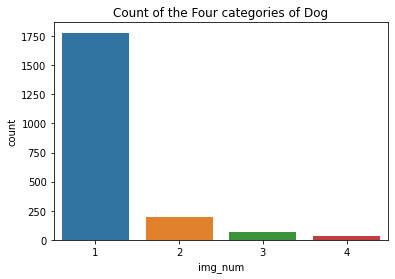

In [201]:
sns.countplot(merged_data.img_num);
plt.title("Count of the Four categories of Dog");

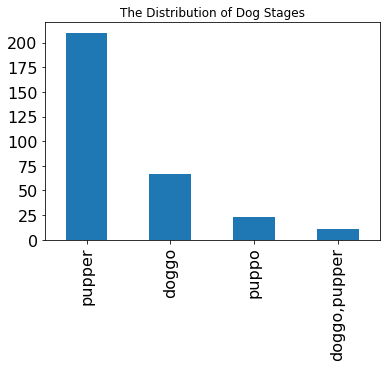

In [204]:
merged_data["stage"].value_counts().head(4).plot.bar(title = ("The Distribution of Dog Stages"), fontsize = 16);

The above graph shows the distributions of dog stages with most dog in the tweet are in the Pupper stage 

### Correlation between between variables

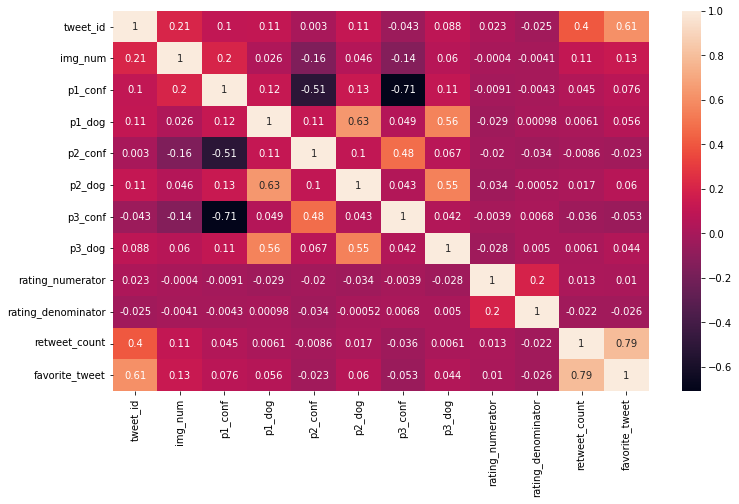

In [209]:
plt.figure(figsize=(12, 7))
sns.heatmap(merged_data.corr(), annot=True);

#### From the above graph it shows that retweet_count and favourite_tweet are positively highly correlated at 79%

/home/mr-francis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


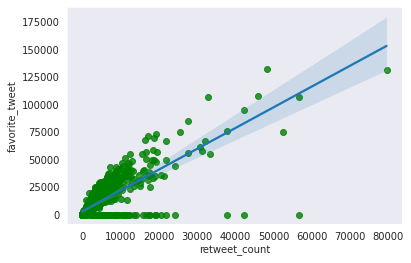

In [212]:
sns.set_style('dark')
sns.regplot(merged_data.retweet_count, merged_data.favorite_tweet, scatter_kws = {'color': 'Green'});

#### In conclusion the correlation map shows the linear relationship between different variables in our dataset especially taken favourite_tweet and retweet_count into consideration, we can see there is a strong positive correlation at 79%, but as the say's goes correlation is not causation meaning for the fact there are highly correlated does mean favourite_tweet affect retweet_count meaning there might other issues or variables that might affect retweet. 